In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
train = pd.read_excel('credit-data-training.xlsx', sheet_name="Sheet1")
train

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,£100-£1000,< 1yr,1,None,1.0,1,NaN,Other Banks/Depts,2,1,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,£100-£1000,< 1yr,1,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,£100-£1000,< 1yr,2,None,NaN,4,27.0,Other Banks/Depts,3,1,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,£100-£1000,4-7 yrs,2,None,NaN,4,63.0,Other Banks/Depts,3,1,1,1,2,1


Após a importação do arquivo, temos alguns dados faltantes conforme gráfico abaixo. Porém seguindo o projeto da Nanodegree da Udacity, algumas variáveis foram excluidas do modelo, conforme procedimento na metodologia. Afim de seguir fielmente a metodologia da Nanodegree algumas variáveis foram removidas, e outra (idade), foi tratada utilizando a mediana. 

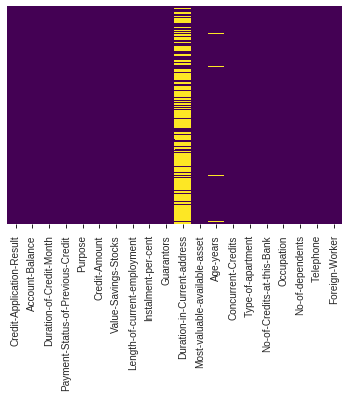

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
del train['Duration-in-Current-address'] 

In [5]:
train.isnull().sum()

Credit-Application-Result             0
Account-Balance                       0
Duration-of-Credit-Month              0
Payment-Status-of-Previous-Credit     0
Purpose                               0
Credit-Amount                         0
Value-Savings-Stocks                  0
Length-of-current-employment          0
Instalment-per-cent                   0
Guarantors                            0
Most-valuable-available-asset         0
Age-years                            12
Concurrent-Credits                    0
Type-of-apartment                     0
No-of-Credits-at-this-Bank            0
Occupation                            0
No-of-dependents                      0
Telephone                             0
Foreign-Worker                        0
dtype: int64

Nessa área queremos limpar os dados. 

Abaixo valores referente a média, mediana e a moda. 

A média equivale a 35,63 anos. A mediana equivale a 33 anos e a moda equivale a 26,5 anos. 

In [6]:
train['Age-years'].mean()


35.63729508196721

In [7]:
train['Age-years'].median()

33.0

In [8]:
train['Age-years'].mode()

0    26.0
1    27.0
dtype: float64

In [9]:
train.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


Quanto mais próximo forem os valores da média, mediana e moda, mais distribuido será o conjunto dos dados. Nesse caso como a 
média é superior a mediana, então vamos utilizar a mediana para imputar esses valores vazios por dois motivos:
Idade não tem numeros quebrados, são números inteiros, logo se descarta imputar valores faltantes com a média. E segundo se a média é superior a mediana, então devemos utilizar a mediana, para diminuir a diferença entre as duas. 

In [10]:
train['Age-years'].fillna(train['Age-years'].median(), inplace=True)

In [11]:
train.isnull().sum()

Credit-Application-Result            0
Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

In [12]:
profile = ProfileReport(train, title='Analise Variaveis Credito')
profile

In [13]:
del train['Guarantors'] 
del train['Concurrent-Credits'] 
del train['Occupation'] 
del train['No-of-dependents'] 
del train['Telephone'] 
del train['Foreign-Worker'] 


In [14]:
train['Credit-Application-Result'].value_counts()

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64

In [15]:
#Variável Binária
print(train['Account-Balance'].value_counts())
print('\n')
print(train['Payment-Status-of-Previous-Credit'].value_counts())
print('\n')
print(train['Purpose'].value_counts())
print('\n')
print(train['Value-Savings-Stocks'].value_counts())
print('\n')
print(train['Length-of-current-employment'].value_counts())
print('\n')
print(train['No-of-Credits-at-this-Bank'].value_counts())

No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64


Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64


Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64


None          298
£100-£1000    154
< £100         48
Name: Value-Savings-Stocks, dtype: int64


< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: Length-of-current-employment, dtype: int64


1              320
More than 1    180
Name: No-of-Credits-at-this-Bank, dtype: int64


Aqui gosto de utilizar o método info para mostrar quais variáveis devo transformar. Nesse caso todos os objetos. 

# Transformação das variáveis categóricas em numéricas

Foi utilizado dois métodos para a transformação. O método get_dummies e o label encoder. Para variáveis binárias foi utilizado o método get_dummies, transformando aquela variável categórica em 0 ou 1. E utilizamos o drop_first para excluir umas das dummies, evitando assim um problema de multi-colonariedade. 
Já para o label encoder, foi utilizado esse método para colunas acima de 3 variáveis ou seja variáveis não binárias.

In [16]:
Acount_balance = {
    "No Account": 0,
    "Some Balance": 1
}

In [17]:
train.replace(Acount_balance,inplace=True)


In [18]:
Num_emprestimo = pd.get_dummies(train['No-of-Credits-at-this-Bank'],drop_first=True)
Tempo_trabalho = pd.get_dummies(train['Length-of-current-employment'],drop_first=True)
resultado = pd.get_dummies(train['Credit-Application-Result'],drop_first=True)


In [19]:
train.drop(['No-of-Credits-at-this-Bank','Length-of-current-employment','Credit-Application-Result'],axis=1,inplace=True)

In [20]:
train = pd.concat([train,Num_emprestimo,Tempo_trabalho,resultado],axis=1)

In [21]:
Payment_Status = {
    "Some Problems": 0,
    "No Problems (in this bank)": 1,
    "Paid Up": 2
}

In [22]:
train.replace(Payment_Status,inplace=True)

In [23]:
Purpose = {
    "Other": 0,
    "New car": 1,
    "Used car": 2,
    "Home Related": 3
}

In [24]:
train.replace(Purpose,inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder


In [26]:
#Poupança
#None=298 100-1000 libras=154 <100=48
vss = train['Value-Savings-Stocks']
set(vss)
label_encoder = LabelEncoder()
VSS = label_encoder.fit_transform(vss)
VSS
train['Value-Savings-Stocks'] = VSS

Depois de rodar os scripts, temos uma base de dados totalmente convertida para variáveis numéricas. Agora sim, vamos iniciar o processo de aprendizagem de máquina, e analisar, quais dos 4 tipos de modelo é o melhor para esse conjunto de dados. 

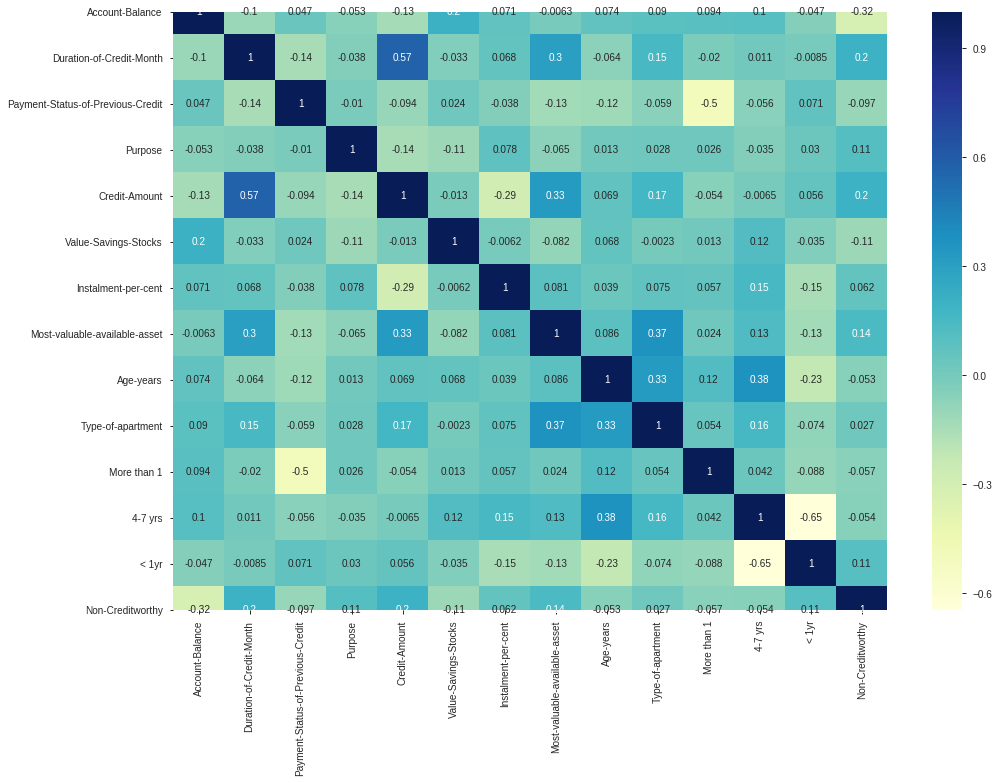

In [28]:
sns.heatmap(train.corr(),cmap='YlGnBu',annot=True)
plt.rcParams['figure.figsize'] = (16, 11)

Conseguimos identificar que não existe nenhuma variavel com alta correlação em "Non-Crefitworthy", que é a nossa variável de classificação que estamos querendo prever. 

Porém existem variáveis que possuem uma correlação média, como é o caso do tempo do empréstimo com o valor do empréstimo. Vamos tirar a prova no gráfico abaixo, referente a essa correlação. 


In [29]:
train['Credito_negado'] = train['Non-Creditworthy']


In [30]:
del train['Non-Creditworthy']

<Figure size 1080x864 with 0 Axes>

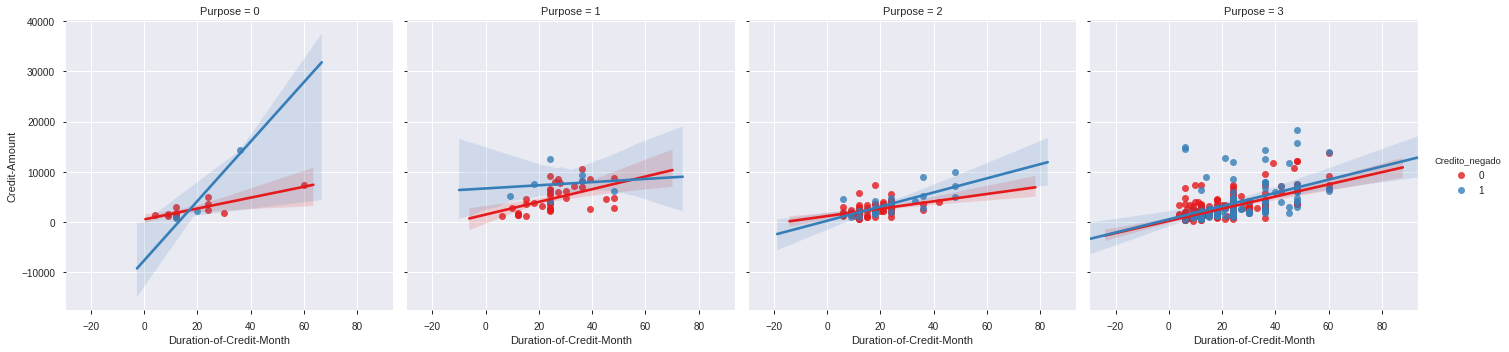

In [31]:
plt.figure(figsize=(15,12))
sns.lmplot(y='Credit-Amount',x='Duration-of-Credit-Month',data=train,hue='Credito_negado',col='Purpose',palette='Set1')

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
import statsmodels.api as sm

In [34]:
X = train.drop('Credito_negado',axis=1)
y = train['Credito_negado']

In [35]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

/home/felipe/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Credito_negado   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     8.461
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.48e-15
Time:                        12:43:23   Log-Likelihood:                -260.25
No. Observations:                 500   AIC:                             548.5
Df Residuals:                     486   BIC:                             607.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0374      0.144      0.260      0.795      -0.246       0.321
Account-Balance                      -0.2464      0.039     -6.342      0.000      -0.323      -0.170
Duration-of-Credit-Month              0.0017      0.002      0.869      0.385      -0.002       0.006
Payment-Status-of-Previous-Credit    -0.0645      0.035     -1.844      0.066      -0.133       0.004
Purpose                               0.0622      0.024      2.576      0.010       0.015       0.110
Credit-Amount                      2.357e-05   9.22e-06      2.557      0.011    5.46e-06    4.17e-05
Value-Savings-Stocks                 -0.0223      0.032     -0.696      0.487      -0.085       0.041
Instalment-per-cent                   0.0485      0.019      2.603      0.010       0.012       0.085
Most-valuable-available-asset         0.0340      0.020      1.678      0.094      -0.006       0.074
Age-years                            -0.0016      0.002     -0.847      0.397      -0.005       0.002
Type-of-apartment                    -0.0089      0.039     -0.225      0.822      -0.086       0.069
More than 1                          -0.0588      0.045     -1.298      0.195      -0.148       0.030
4-7 yrs                               0.0566      0.060      0.946      0.344      -0.061       0.174
< 1yr                                 0.1219      0.049      2.469      0.014       0.025       0.219
==============================================================================
Omnibus:                       47.990   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.799
Skew:                           0.723   Prob(JB):                     1.54e-11
Kurtosis:                       2.452   Cond. No.                     3.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix


## Validação Cruzada para modelos logísticos


In [37]:
from sklearn.linear_model import LogisticRegressionCV

In [38]:
logmodel1 = LogisticRegressionCV(cv=10, random_state=96).fit(X, y)
logmodel1

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of it

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=96, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [39]:
logmodel1.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [40]:
pred1 = logmodel1.predict(X)


In [41]:
logmodel1.score(X, y)

0.756

# Avaliação Modelo Logístico


In [42]:
print(classification_report(y,pred1))
print('\n')
print(confusion_matrix(y,pred1))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       358
           1       0.66      0.30      0.41       142

    accuracy                           0.76       500
   macro avg       0.71      0.62      0.63       500
weighted avg       0.74      0.76      0.72       500



[[336  22]
 [100  42]]


## Validação Cruzada

In [101]:
classes = train['Credito_negado']
train.drop('Credito_negado', axis=1, inplace=True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm

In [ ]:
clf = svm.SVC().fit(train,classes)
clf

In [ ]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y,resultados)

In [ ]:
Acuracia(clf,train,classes)

In [ ]:
# Imprime as métricas: 'precisão, revocação e Medida F1.
resultados = cross_val_predict(clf,train, classes, cv=10)
valor_classes = [0,1]
print (metrics.classification_report(classes,resultados,valor_classes))
print("\n")
print (confusion_matrix(classes,resultados,valor_classes))

In [ ]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

In [ ]:
pip_1.steps

In [ ]:
Acuracia(pip_1,train,classes)

In [ ]:
# Criando vários Pipelines
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

In [ ]:
print(Acuracia(pip_1,train,classes))
print("\n")
print(Acuracia(pip_2,train,classes))
print("\n")
print(Acuracia(pip_3,train,classes))
print("\n")
print(Acuracia(pip_4,train,classes))
print("\n")
print(Acuracia(pip_5,train,classes))

## Tuning do modelo

In [ ]:
# Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Lista de Valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Lista de Valores de gamma
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
# Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [ ]:
parametros_grid

In [ ]:
# Objeto Grid recebe parâmetros de Pipeline, e configurações de cross validation
grid = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [ ]:
# Aplica o gridsearch passando os dados de treino e classes.
grid.fit(train,classes)

In [ ]:
grid.cv_results_

In [ ]:
# Imprime os melhores parâmetros
grid.best_params_

In [ ]:
grid.best_score_

# Model KNN

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(train.drop('Credito_negado',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
scaled_features = scaler.transform(train.drop('Credito_negado',axis=1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['Credito_negado'],
                                                    test_size=0.30, random_state=101)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)

In [54]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [55]:
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [56]:
knn.score(X, y)


0.814

# Previsão e Avaliação Modelo KNN


In [57]:
pred2 = knn.predict(X)

In [59]:
print(classification_report(y,pred2))
print('\n')
print(confusion_matrix(y,pred2))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       358
           1       0.75      0.52      0.61       142

    accuracy                           0.81       500
   macro avg       0.79      0.73      0.75       500
weighted avg       0.81      0.81      0.80       500



[[333  25]
 [ 68  74]]


# Training a Decision Tree Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Credit-Application-Result',axis=1), 
                                                    train['Credit-Application-Result'], test_size=0.30, 
                                                    random_state=101)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [79]:
dtree = DecisionTreeClassifier()

In [80]:
dtree.fit(X[:-150],y[:-150])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [104]:
res = cross_val_score(dtree, X, y, cv=10)
res.mean()

0.5440128051220487

In [95]:

from sklearn import metrics

In [102]:
# Função que retorna a acurácia após fazer um validação cruzada (cross validation)
def Acuracia(dtree,X,y):
    resultados = cross_val_predict(dtree, X, y, cv=10)
    return metrics.accuracy_score(y,resultados)

In [103]:
Acuracia(dtree,train,classes)

0.528

In [105]:
print (pd.crosstab(classes,dtree.predict(X),rownames=['Real'], colnames=['Predito'], margins=True),'')

Predito    0    1  All
Real                  
0        330   28  358
1         27  115  142
All      357  143  500 


# Previsões e avaliação da árvore de decisão

In [85]:
pred3 = dtree.predict(X)

In [86]:
print(classification_report(y,pred3))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       358
           1       0.80      0.81      0.81       142

    accuracy                           0.89       500
   macro avg       0.86      0.87      0.87       500
weighted avg       0.89      0.89      0.89       500



In [87]:
print(confusion_matrix(y,pred3))

[[330  28]
 [ 27 115]]


# Treinando o modelo de florestas aleatórias

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Credit-Application-Result',axis=1), 
                                                    train['Credit-Application-Result'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc.score(X_test, y_test)

# Previsões e Avaliação

In [ ]:
pred4 = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,pred4))

In [ ]:
print(confusion_matrix(y_test,pred4))

# Qual modelo escolher?

In [ ]:
#Modelo Logaritmo
print('Logaritmo')
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print('\n')

#KNN
print('KNN')
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print('\n')

#Arvore de decisão
print('Arvore de decisão')
print(classification_report(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print('\n')

#Floresta aleatória
print('Floresta Aleatória')
print(classification_report(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print('\n')


## Feature Importance

## Árvore de Decisão

In [ ]:
dtree.feature_importances_

In [ ]:
feature_imp = pd.Series(dtree.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

In [ ]:
visualiza_features_importantes(feature_imp)

In [ ]:
X = train[['Age-years', 'Credit-Amount', 'Duration-of-Credit-Month', 'Account-Balance', 'Payment-Status-of-Previous-Credit', 'Value-Savings-Stocks','Most-valuable-available-asset']]
y = train['Credit-Application-Result']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
precisao_conjunto_treino = []
precisao_conjunto_teste = []

for numero in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = numero)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)
    
    precisao_conjunto_treino.append(dtree.score(X_train, y_train))
    precisao_conjunto_teste.append(dtree.score(X_test, y_test))

In [ ]:
#Criando gráfico com cada 
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(precisao_conjunto_treino, label = 'Score em conjunto de treino')
plt.plot(precisao_conjunto_teste, label = 'Score em conjunto de teste')
plt.xlabel('random_state')
plt.ylabel('Score')
plt.title('INFLUÊNCIA DO RANDOM_STATE NO SCORE')
plt.legend()
plt.show()

In [ ]:
dtree1 = DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
dtree1.fit(X_train,y_train)

In [ ]:
pred31 = dtree1.predict(X_test)

In [ ]:
print(classification_report(y_test,pred31))
print('\n')
print(confusion_matrix(y_test,pred31))

## Floresta Aleatória

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Credit-Application-Result',axis=1), 
                                                    train['Credit-Application-Result'], test_size=0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
rfc.feature_importances_

In [ ]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

In [ ]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

In [ ]:
visualiza_features_importantes(feature_imp)

In [ ]:
X = train[['Instalment-per-cent', 'Most-valuable-available-asset', 'Payment-Status-of-Previous-Credit', 'Most-valuable-available-asset', 'Payment-Status-of-Previous-Credit', 'Age-years', 'Duration-of-Credit-Month', 'Credit-Amount']]
y = train['Credit-Application-Result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None, test_size=0.30)

In [ ]:
rfcc = DecisionTreeClassifier()

In [ ]:
rfcc.fit(X_train, y_train)

In [ ]:
rfcc.score(X_train, y_train)

In [ ]:
pred41 = rfcc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred41))
print(confusion_matrix(y_test,pred41))

O modelo a ser escolhido é o Arvore de Decisão, pois tem os melhores indicadores, pois foi o modelo que melhor perfomou. ALém do mais, a matriz de confusão apenas constata o que o resultado do modelo nos revela. 

## Treinando o modelo com 100% do arquivo. E depois usar o predict no arquivo a ser previsto. 


In [ ]:
X = train[['Instalment-per-cent', 'Most-valuable-available-asset', 'Payment-Status-of-Previous-Credit', 'Most-valuable-available-asset', 'Payment-Status-of-Previous-Credit', 'Some Balance', 'Age-years', 'Duration-of-Credit-Month', 'Credit-Amount']]
y = train['Non-Creditworthy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48, train_size=0.9999)

In [ ]:
rfcc = DecisionTreeClassifier()

In [ ]:
rfcc.fit(X_train, y_train)

In [ ]:
pred42 = rfcc.predict(X_train)

In [ ]:
res = pd.read_excel('4.customers-to-score.xlsx', sheet_name="Sheet1")
res



In [ ]:
res = pd.DataFrame()
res['Non-Creditworthy'] = pred42
res.to_csv('submission3.csv',index=False)


In [ ]:
a = pd.read_csv('submission3.csv')
a

In [ ]:
a['Non-Creditworthy'].value_counts()

No nosso modelo 358 pessoas estavam aptos a receber o crédito, enquanto 141 tiveram seus pedidos negados. 